# Battery environment demo

Purpose of this notebook is to demonstrate the 'battery' environment.

## Demo 1

In [1]:
import numpy as np

from energy_py.envs.battery.env_battery import Battery_Env

In [2]:
env = Battery_Env(lag=0,
                  episode_length=48,
                  power_rating=2,
                  capacity=10,
                 initial_charge=0,
                 verbose=1)

Reset environment.


We reload the state infomation from a local csv - for reproducibility.

In [3]:
env.observation_ts, env.state_ts = env.load_state('state.csv', env.lag)                                                           

We simulate the actions of an agent using a numpy array.

In [4]:
actions = np.full((48, 1), [1])
actions[20:24] = -1
actions[30:34] = -1
actions

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1]])

We now step through the environment by simulating actions

In [5]:
env.reset()
for action in actions:
    observation, reward, done, info = env.step(action)

Reset environment.
step is 0
action was 1
old charge was 0.0
new charge is 0.4
rate is 0.8
losses were 0.09999999999999998
step is 1
action was 1
old charge was 0.4
new charge is 0.8
rate is 0.8
losses were 0.09999999999999998
step is 2
action was 1
old charge was 0.8
new charge is 1.2000000000000002
rate is 0.8000000000000003
losses were 0.09999999999999998
step is 3
action was 1
old charge was 1.2000000000000002
new charge is 1.6
rate is 0.7999999999999998
losses were 0.09999999999999998
step is 4
action was 1
old charge was 1.6
new charge is 2.0
rate is 0.7999999999999998
losses were 0.09999999999999998
step is 5
action was 1
old charge was 2.0
new charge is 2.4
rate is 0.7999999999999998
losses were 0.09999999999999998
step is 6
action was 1
old charge was 2.4
new charge is 2.8
rate is 0.7999999999999998
losses were 0.09999999999999998
step is 7
action was 1
old charge was 2.8
new charge is 3.1999999999999997
rate is 0.7999999999999998
losses were 0.09999999999999998
step is 8
acti

In [6]:
outputs = env.output_info()

RL cost was 4953.870670689999
BAU cost was 4864.3709266900005
Savings were -89.49974399999883


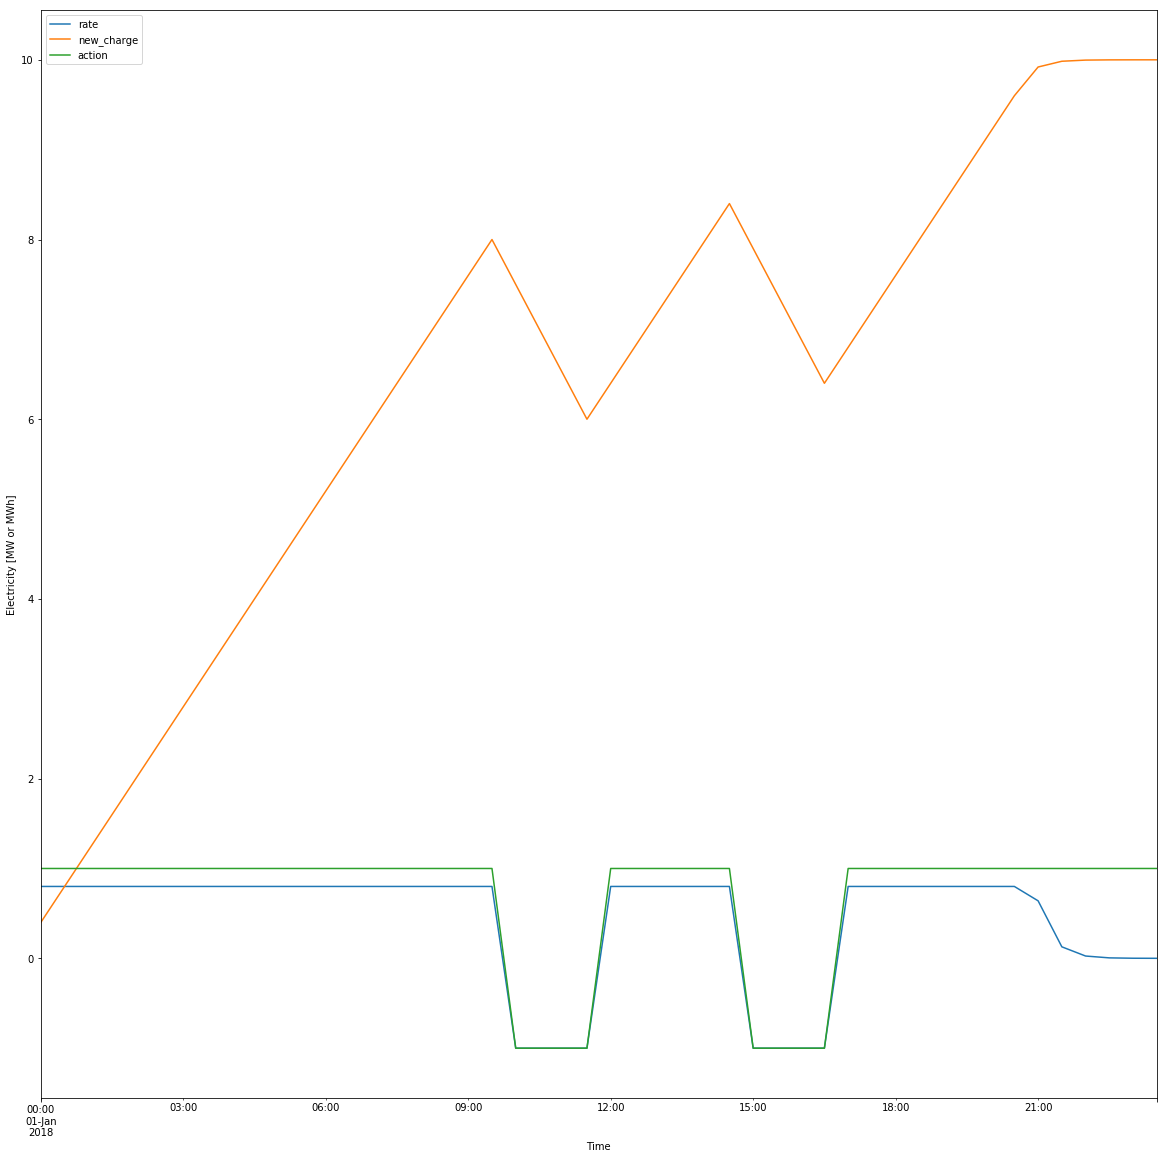

In [7]:
fig1 = outputs['technical_fig']
fig1

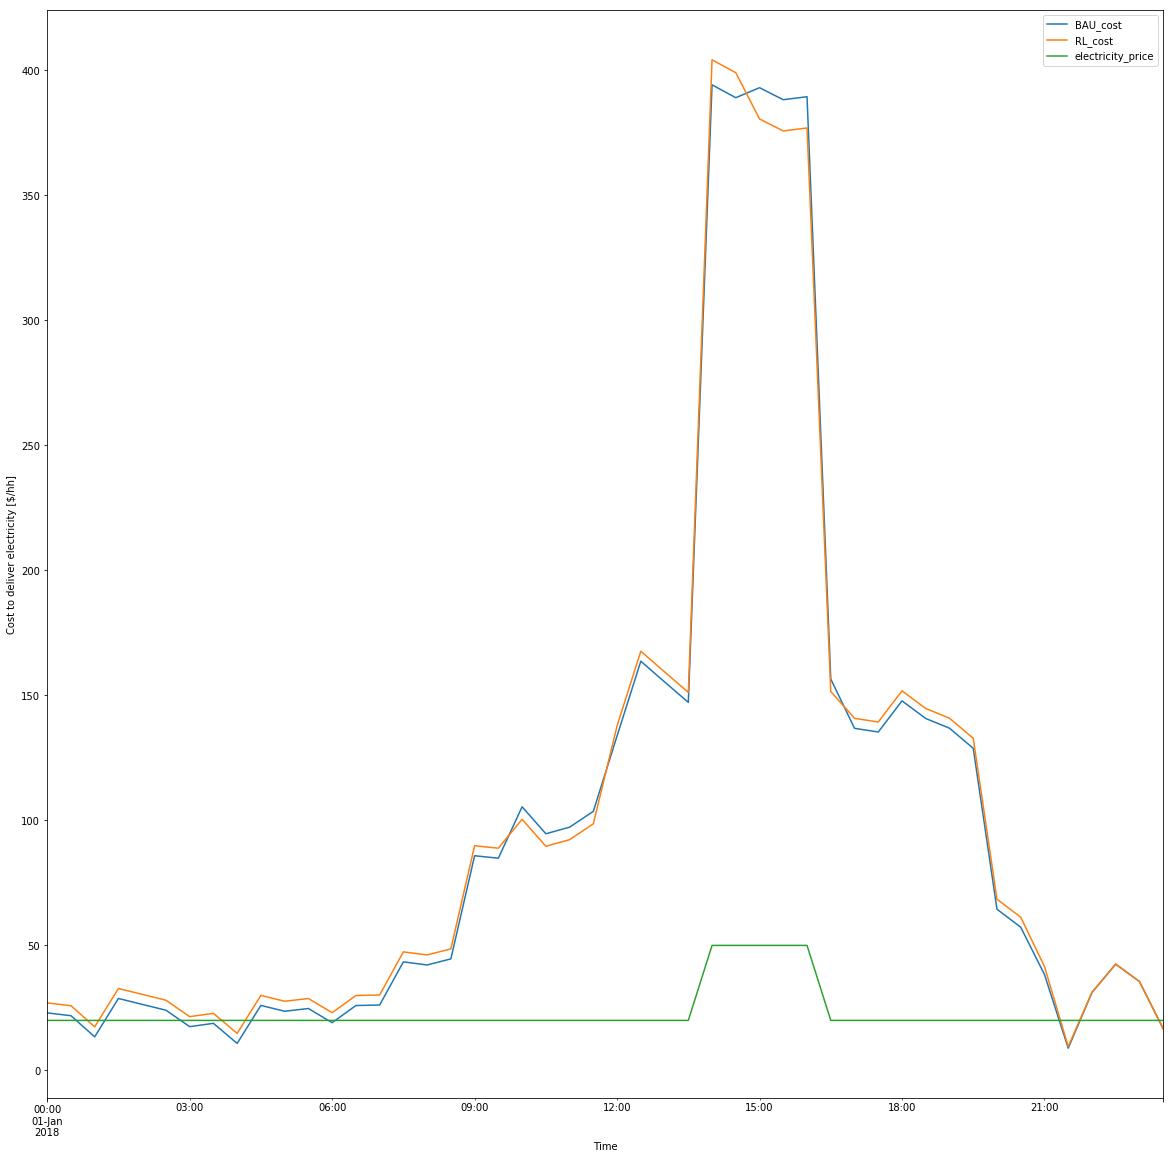

In [8]:
fig2 = outputs['cost_fig']
fig2

In [9]:
df = outputs['dataframe']

In [10]:
df.head()

,BAU_cost,RL_cost,action,electricity_demand,electricity_price,new_charge,next_observation,next_state,observation,rate,reward,state,steps
SETTLEMENTDATE,,,,,,,,,,,,,
2018-01-01 00:00:00,23.000000,27.000000,1,2.300000,20.0,0.4,"[20.0, 2.188029537]","[20.0, 2.188029537, 0.4]","[20.0, 2.3]",0.8,-27.000000,"[20.0, 2.3, 0.0]",0
2018-01-01 00:30:00,21.880295,25.880295,1,2.188030,20.0,0.8,"[20.0, 1.343232399]","[20.0, 1.343232399, 0.8]","[20.0, 2.188029537]",0.8,-25.880295,"[20.0, 2.188029537, 0.4]",1
2018-01-01 01:00:00,13.432324,17.432324,1,1.343232,20.0,1.2,"[20.0, 2.877774027]","[20.0, 2.877774027, 1.2]","[20.0, 1.343232399]",0.8,-17.432324,"[20.0, 1.343232399, 0.8]",2
2018-01-01 01:30:00,28.777740,32.777740,1,2.877774,20.0,1.6,"[20.0, 2.64172202]","[20.0, 2.64172202, 1.6]","[20.0, 2.877774027]",0.8,-32.777740,"[20.0, 2.877774027, 1.2]",3
2018-01-01 02:00:00,26.417220,30.417220,1,2.641722,20.0,2.0,"[20.0, 2.408416723]","[20.0, 2.408416723, 2.0]","[20.0, 2.64172202]",0.8,-30.417220,"[20.0, 2.64172202, 1.6]",4


In [11]:
df.shape

(48, 13)

## Demo 2

In this run we
- start at max charge
- discharge at all times, except during the peaks 
- charge during peaks

This run should show
- battery minimum charge level at 0 MWh

In [12]:
env2 = Battery_Env(lag=0,
                  episode_length=48,
                  power_rating=2,
                  capacity=10,
                 initial_charge=10)

env2.observation_ts, env2.state_ts = env2.load_state('state.csv', env2.lag)
 
actions2 = np.full((48), [-1])
actions2[20:24] = 1
actions2[30:34] = 1
actions2    

Reset environment.


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Reset environment.
RL cost was 4782.3709266900005
BAU cost was 4864.3709266900005
Savings were 82.0


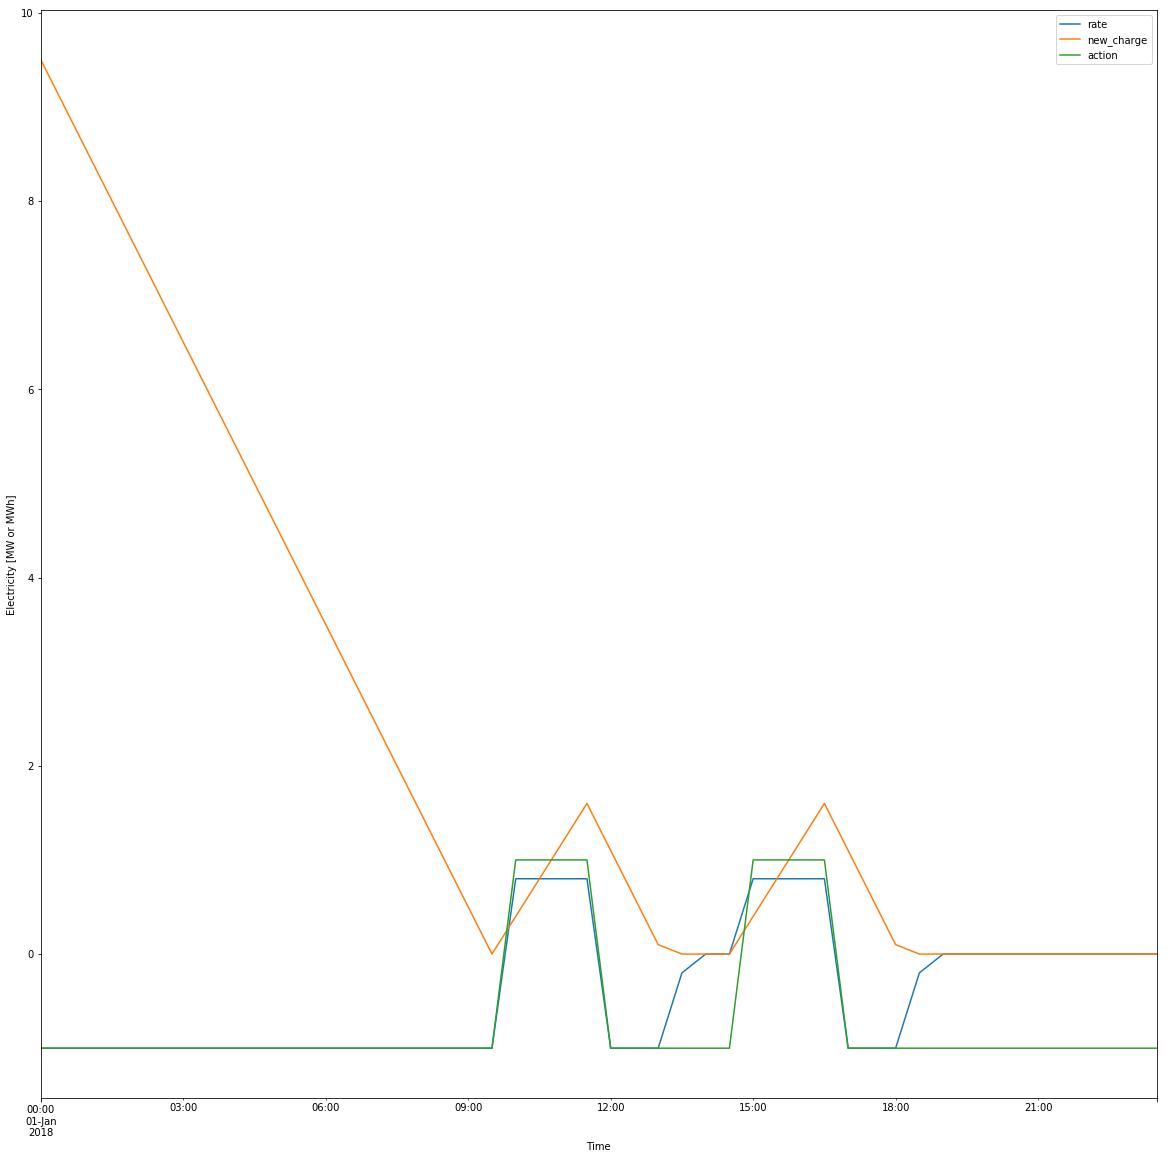

In [13]:
env2.reset()
for action in actions2:
    observation, reward, done, info = env2.step([action])
    
outputs_2 = env2.output_info()

fig1_2 = outputs_2['technical_fig']
fig1_2